In [4]:
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('inputs/saved_neurons_all.csv')
df

,layer,neuron,score,explanation
0,0,0,0.653476,"the word ""ME"" or a part of a word containing ..."
1,0,1,0.198200,words related to locations and places.
2,0,2,0.469964,"negative or denial phrases, often including t..."
3,0,3,0.068951,question marks and words associated with unce...
4,0,4,0.275358,"proper nouns, often related to people, and so..."
...,...,...,...,...
95994,47,1995,0.017116,words related to numbers and numerical values.
95995,47,1996,-0.017137,words and phrases related to objects and thei...
95996,47,1997,0.118504,numerical values and punctuation marks.
95997,47,1998,0.048060,numerical values and statistics within the text.


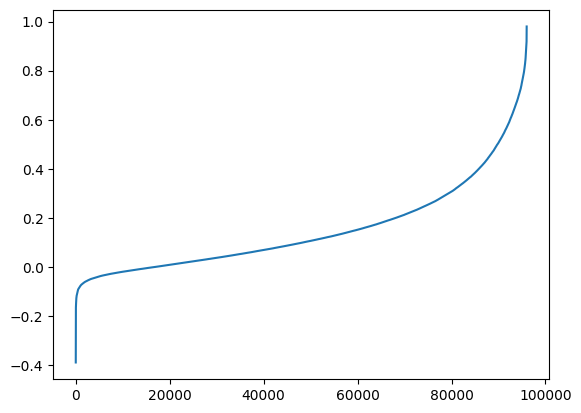

In [6]:
scores = list(df['score'])
plt.plot(sorted(scores))

(array([3.0000e+00, 1.9800e+02, 2.4298e+04, 3.6771e+04, 1.7728e+04,
        8.3350e+03, 4.4430e+03, 2.6430e+03, 1.3130e+03, 2.6700e+02]),
 array([-0.38782203, -0.25105237, -0.1142827 ,  0.02248697,  0.15925663,
         0.2960263 ,  0.43279597,  0.56956563,  0.7063353 ,  0.84310497,
         0.97987463]),
 <BarContainer object of 10 artists>)

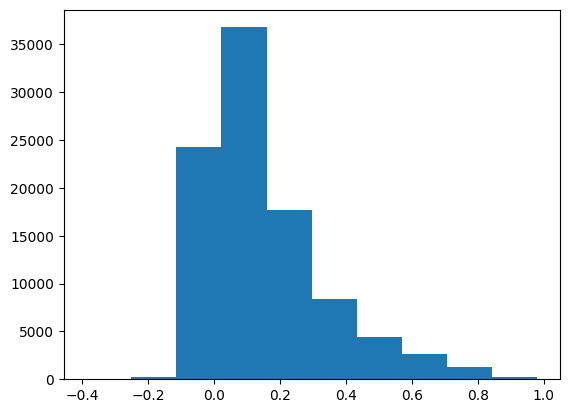

In [7]:
plt.hist(scores)

In [8]:
for layer in range(0, 48):
    layer_score = list(df[df['layer']==layer]['score'])
    layer_score = np.array(layer_score)
    print(layer, np.sum(layer_score>0.3)/2000, np.sum(layer_score>0.35)/2000, np.sum(layer_score>0.4)/2000)

0 0.596 0.528 0.461
1 0.652 0.6035 0.546
2 0.552 0.482 0.4175
3 0.4985 0.4335 0.3665
4 0.431 0.3645 0.299
5 0.374 0.3165 0.2595
6 0.3455 0.288 0.2345
7 0.3005 0.247 0.195
8 0.248 0.1985 0.158
9 0.231 0.1765 0.133
10 0.19 0.1465 0.115
11 0.1675 0.126 0.097
12 0.1645 0.1205 0.0875
13 0.144 0.112 0.081
14 0.137 0.0995 0.0745
15 0.1225 0.081 0.0595
16 0.1085 0.075 0.0565
17 0.1275 0.0955 0.0675
18 0.123 0.0875 0.062
19 0.137 0.1055 0.0735
20 0.1465 0.1115 0.083
21 0.148 0.113 0.0885
22 0.1535 0.115 0.0875
23 0.1435 0.1015 0.073
24 0.13 0.096 0.077
25 0.147 0.115 0.083
26 0.142 0.109 0.077
27 0.1445 0.1095 0.08
28 0.1375 0.096 0.067
29 0.1245 0.089 0.063
30 0.1255 0.086 0.0595
31 0.113 0.0785 0.046
32 0.101 0.069 0.047
33 0.102 0.0695 0.0415
34 0.086 0.0575 0.0335
35 0.0775 0.0485 0.0275
36 0.074 0.0475 0.0295
37 0.0785 0.0485 0.028
38 0.062 0.0315 0.0235
39 0.0585 0.0305 0.017
40 0.053 0.03 0.014
41 0.0535 0.031 0.0175
42 0.054 0.0355 0.0225
43 0.052 0.0265 0.018
44 0.046 0.0215 0.009
45 0

In [9]:
new_df = []
for layer in range(0, 48):
    layer_df = df[df['layer']==layer]
    high_df = layer_df[layer_df['score']>=0.35]
    new_df.append(high_df.sample(20))
    #print(layer, len(high_df))

In [10]:
new_df = pd.concat(new_df)
new_df

,layer,neuron,score,explanation
210,0,210,0.379923,words related to feathers and bird-like chara...
514,0,514,0.769312,names of car companies and related industry te...
1114,0,1114,0.581401,parts of words with the letter sequence 'es'.
1637,0,1637,0.612169,"words related to darkness, both literally and ..."
109,0,109,0.437644,names and words related to actions or emotions.
...,...,...,...,...
95937,47,1938,0.495848,references to CEOs and high-ranking executives.
94149,47,150,0.354141,capital letter 'B' and related single capital...
94297,47,298,0.380277,words related to parts of machines or vehicles.
95882,47,1883,0.367677,names of people and characters.


In [11]:
new_df.to_csv("neurons_to_evaluate_.csv", index=False)